# POKEMANS

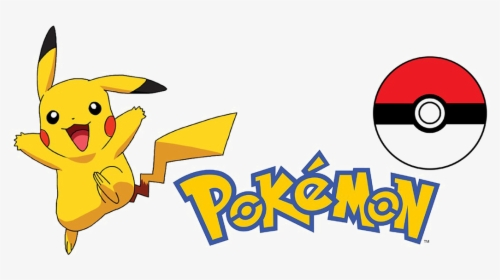

## Table of Contents

* [I.Overview Analysis](#part-one)
    - [A. How many Pokemon are there in total?  How many per generation?](#subsection-a)
    - [B. What is the most common type of Pokemon?  Per generation?](#subsection-b)
    - [C. How do stats vary across generations and between legendary and non-legendary Pokemon?](#subsection-c)
* [II. Comparison of Starter Pokemon](#part-two)
    - [A. Stage 1](#subsection-aa)
    - [B. Stage 2](#subsection-bb)
    - [C. Stage 3](#subsection-cc)
    - [D. Type (Grass, Water, Fire)](#subsection-dd)
* [III. Comparison of Eeveelutions](#part-three)


<a id="part-one"></a>
### I. Overview Analysis

***Questions:***

A. How many Pokemon are there in total?  How many per generation? <br>
B. What is the most common type of pokemon?  Per generation? <br>
C. How do stats vary across generations and between legendary and non-legendary Pokemon?

In [1]:
##load libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [2]:
##import the data
pm= pd.read_csv('Pokemon.csv')

In [3]:
##inspect the data
pm.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
pm.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [5]:
pm.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [6]:
##create a type 0 column to view both types together
pm_edit = pm.fillna('none')
pm_edit.iloc[40:50]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
40,35,Clefairy,Fairy,none,323,70,45,48,60,65,35,1,False
41,36,Clefable,Fairy,none,483,95,70,73,95,90,60,1,False
42,37,Vulpix,Fire,none,299,38,41,40,50,65,65,1,False
43,38,Ninetales,Fire,none,505,73,76,75,81,100,100,1,False
44,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False
46,41,Zubat,Poison,Flying,245,40,45,35,30,40,55,1,False
47,42,Golbat,Poison,Flying,455,75,80,70,65,75,90,1,False
48,43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False
49,44,Gloom,Grass,Poison,395,60,65,70,85,75,40,1,False


In [7]:
# Creating a brand new column appending then types 1 and 2 together
pm_edit['Type 0']= pm_edit['Type 1']+ "/" + pm_edit['Type 2']
pm_edit.iloc[40:90]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0
40,35,Clefairy,Fairy,none,323,70,45,48,60,65,35,1,False,Fairy/none
41,36,Clefable,Fairy,none,483,95,70,73,95,90,60,1,False,Fairy/none
42,37,Vulpix,Fire,none,299,38,41,40,50,65,65,1,False,Fire/none
43,38,Ninetales,Fire,none,505,73,76,75,81,100,100,1,False,Fire/none
44,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False,Normal/Fairy
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False,Normal/Fairy
46,41,Zubat,Poison,Flying,245,40,45,35,30,40,55,1,False,Poison/Flying
47,42,Golbat,Poison,Flying,455,75,80,70,65,75,90,1,False,Poison/Flying
48,43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False,Grass/Poison
49,44,Gloom,Grass,Poison,395,60,65,70,85,75,40,1,False,Grass/Poison


In [36]:
#create an avg skill point column
pm_edit['average_skp']= (pm_edit['Total']/ 6)
pm_edit.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0,average_skp
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass/Poison,53.000000
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass/Poison,67.500000
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass/Poison,87.500000
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass/Poison,104.166667
4,4,Charmander,Fire,none,309,39,52,43,60,50,65,1,False,Fire/none,51.500000


In [37]:
pm_edit.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0,average_skp
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass/Poison,53.000000
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass/Poison,67.500000
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass/Poison,87.500000
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass/Poison,104.166667
4,4,Charmander,Fire,none,309,39,52,43,60,50,65,1,False,Fire/none,51.500000


<a id="subsection-a"></a>
**A. How many Pokemon are there in total?  How many per generation?**

In [38]:
pm_edit.nunique()
## 721 total pokemon

#              721
Name           800
Type 1          18
Type 2          19
Total          200
              ... 
Speed          108
Generation       6
Legendary        2
Type 0         154
average_skp    200
Length: 15, dtype: int64

In [39]:
pm_edit.groupby('Generation').nunique()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Type 0,average_skp
Generation,,,,,,,,,,,,,,
1,151,166,15,14,82,42,52,47,39,30,45,2,41,82
2,100,106,16,15,53,26,40,37,36,34,33,2,48,53
3,135,160,16,15,77,39,46,42,49,43,39,2,51,77
4,107,121,17,17,68,46,61,56,56,53,51,2,57,68
5,156,165,17,16,88,48,60,46,54,42,67,2,58,88
6,72,82,17,13,59,40,46,44,46,50,51,2,38,59


In [12]:
#Gen1 151
#Gen2 100
#Gen3 135
#Gen4 107
#Gen5 156
#Gen6 72

In [40]:
## So here I've made the decision to drop the "mega" pokemon
## I am a 90s kid so I won't deny the age bias in this decision
## Primarily though, the stats for those pokemon are so far blown out of proportion that they are all essentially outliers (see below)
## The average skill point value for mega pokemon is about 30 points higher than the average skill point value for non-mega pokemon

pm_2 = pm_edit.loc[~pm_edit['Name'].str.contains('Mega ')]

In [41]:
megas = pm_edit.loc[pm_edit['Name'].str.contains('Mega ')]

In [42]:
#megas
megas.loc[:,['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed','average_skp']].describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,average_skp
count,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,617.541667,78.25000,126.229167,106.125000,113.395833,99.375000,94.166667,102.923611
std,68.911278,15.84835,34.631335,37.043749,42.368063,18.586915,35.378400,11.485213
min,480.000000,50.00000,50.000000,40.000000,15.000000,60.000000,20.000000,80.000000
25%,580.000000,68.00000,100.000000,80.000000,77.500000,85.000000,75.000000,96.666667
50%,610.000000,78.00000,131.000000,100.000000,120.000000,98.000000,100.000000,101.666667
75%,634.250000,90.00000,150.000000,120.000000,141.250000,111.250000,115.000000,105.708333
max,780.000000,108.00000,190.000000,230.000000,194.000000,150.000000,150.000000,130.000000


In [16]:
#non-megas
pm_2.loc[:,['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed','average_skp']].describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,average_skp
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,423.457447,68.684840,75.986702,71.781915,70.230053,70.148936,66.625000,70.576241
std,112.918614,25.932164,29.901433,29.628059,30.247299,27.404533,27.831341,18.819769
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,30.000000
25%,325.000000,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,54.166667
50%,430.000000,65.000000,75.000000,68.000000,65.000000,65.000000,65.000000,71.666667
75%,500.000000,80.000000,95.000000,90.000000,90.000000,85.000000,88.250000,83.333333
max,770.000000,255.000000,180.000000,230.000000,180.000000,230.000000,180.000000,128.333333


<a id="subsection-b"></a>
**B. What is the most common type of Pokemon?  Per generation?**

In [44]:
#how many types?
pm_2['Type 1'].nunique()

18

In [45]:
#what are the types?
pm_2['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [46]:
#how many type combos?
pm_2['Type 0'].nunique()

150

In [47]:
#what are all of the different type combos?
pm_2['Type 0'].unique()

array(['Grass/Poison', 'Fire/none', 'Fire/Flying', 'Water/none',
       'Bug/none', 'Bug/Flying', 'Bug/Poison', 'Normal/Flying',
       'Normal/none', 'Poison/none', 'Electric/none', 'Ground/none',
       'Poison/Ground', 'Fairy/none', 'Normal/Fairy', 'Poison/Flying',
       'Bug/Grass', 'Fighting/none', 'Water/Fighting', 'Psychic/none',
       'Water/Poison', 'Rock/Ground', 'Water/Psychic', 'Electric/Steel',
       'Water/Ice', 'Ghost/Poison', 'Grass/Psychic', 'Ground/Rock',
       'Grass/none', 'Psychic/Fairy', 'Ice/Psychic', 'Water/Flying',
       'Rock/Water', 'Rock/Flying', 'Ice/Flying', 'Electric/Flying',
       'Dragon/none', 'Dragon/Flying', 'Water/Electric', 'Fairy/Flying',
       'Psychic/Flying', 'Water/Fairy', 'Rock/none', 'Grass/Flying',
       'Water/Ground', 'Dark/none', 'Dark/Flying', 'Ghost/none',
       'Normal/Psychic', 'Bug/Steel', 'Ground/Flying', 'Steel/Ground',
       'Bug/Rock', 'Bug/Fighting', 'Dark/Ice', 'Fire/Rock', 'Ice/Ground',
       'Water/Rock', 'Steel/F

In [48]:
## all type combo counts
pm_2['count']=1

/tmp/ipykernel_12076/2154789845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm_2['count']=1


In [49]:
pd.set_option('display.max_rows', 500)
pm_2.groupby(['Type 0'], dropna='False').count()['count']

Type 0
Bug/Electric         2
Bug/Fighting         1
Bug/Fire             2
Bug/Flying          13
Bug/Ghost            1
Bug/Grass            6
Bug/Ground           2
Bug/Poison          11
Bug/Rock             3
Bug/Steel            6
Bug/Water            1
Bug/none            17
Dark/Dragon          3
Dark/Fighting        2
Dark/Fire            2
Dark/Flying          5
Dark/Ghost           1
Dark/Ice             2
Dark/Psychic         2
Dark/Steel           2
Dark/none            9
Dragon/Electric      1
Dragon/Fire          1
Dragon/Flying        4
Dragon/Ground        4
Dragon/Ice           3
Dragon/Psychic       2
Dragon/none         11
Electric/Fairy       1
Electric/Fire        1
Electric/Flying      5
Electric/Ghost       1
Electric/Grass       1
Electric/Ice         1
Electric/Normal      2
Electric/Steel       3
Electric/Water       1
Electric/none       26
Fairy/Flying         2
Fairy/none          15
Fighting/Dark        1
Fighting/Flying      1
Fighting/Psychic     2
Figh

In [50]:
##most common types overall
pd.set_option('display.max_rows', 10)
pm_2.groupby(['Type 0'], dropna='False').count().sort_values('#', ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,average_skp,count
Type 0,,,,,,,,,,,,,,,
Normal/none,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
Water/none,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58
Psychic/none,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
Grass/none,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
Fire/none,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rock/Dark,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Ice/Ghost,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Rock/Fighting,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


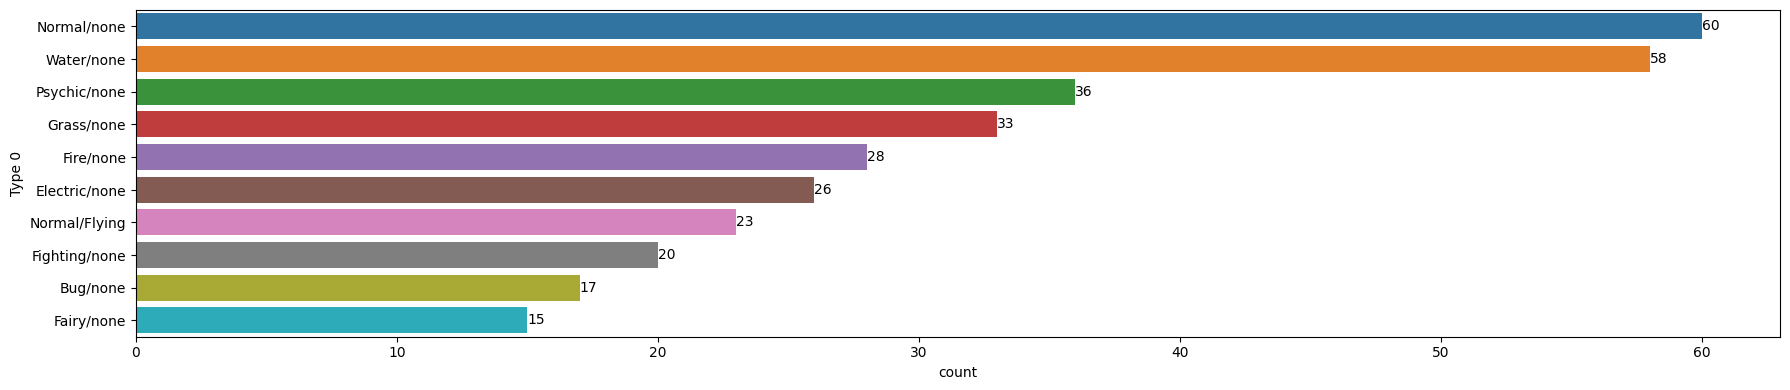

In [53]:
##most common types overall visualized
ctypes = sns.countplot(y='Type 0', data=pm_2, order= pm_2['Type 0'].value_counts().nlargest(n=10).index)
ctypes.bar_label(ctypes.containers[0]);

In [54]:
##most common type per generation
gen1 = pm_2.loc[pm_2['Generation']==1]

In [55]:
gen2 = pm_2.loc[pm_2['Generation']==2]

In [56]:
gen3 = pm_2.loc[pm_2['Generation']==3]

In [57]:
gen4 = pm_2.loc[pm_2['Generation']==4]

In [58]:
gen5 = pm_2.loc[pm_2['Generation']==5]

In [59]:
gen6 = pm_2.loc[pm_2['Generation']==6]

Text(0.5, 1.0, 'Gen3')

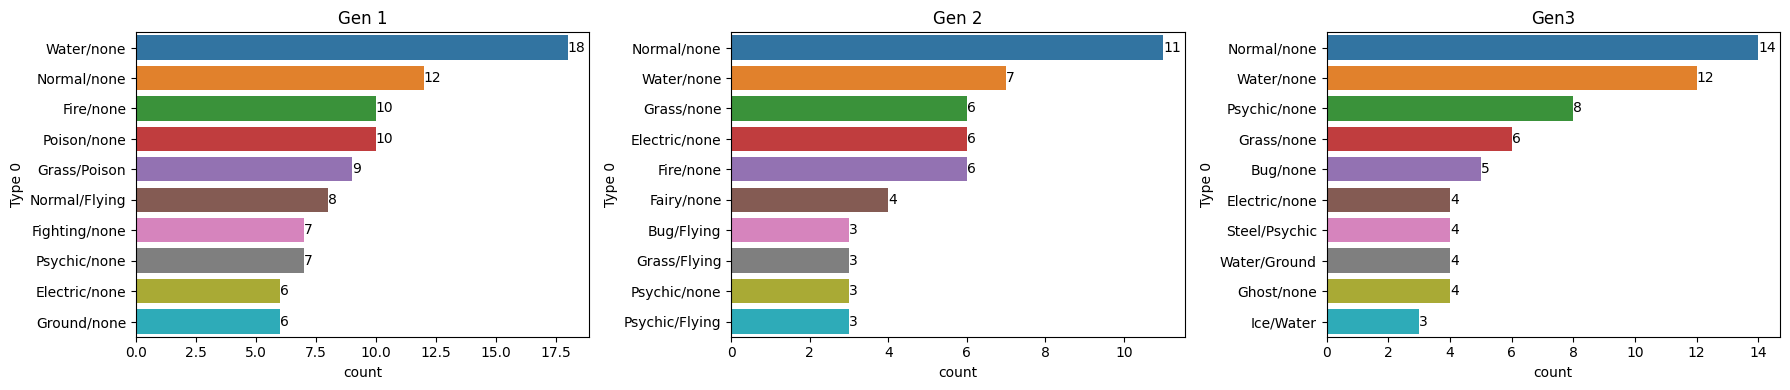

In [60]:
##gen1, gen2, and gen3 side by side
plt.rcParams["figure.figsize"] = [18.00, 4.00]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(nrows=1, ncols=3)

gen1ctypes = sns.countplot(y='Type 0', data=gen1, order= gen1['Type 0'].value_counts().nlargest(n=10).index, ax= ax[0])
gen1ctypes.bar_label(gen1ctypes.containers[0]);
gen1ctypes.set_title('Gen 1')

gen2ctypes = sns.countplot(y='Type 0', data=gen2, order= gen2['Type 0'].value_counts().nlargest(n=10).index, ax= ax[1])
gen2ctypes.bar_label(gen2ctypes.containers[0]);
gen2ctypes.set_title('Gen 2')

gen3ctypes = sns.countplot(y='Type 0', data=gen3, order= gen3['Type 0'].value_counts().nlargest(n=10).index, ax= ax[2])
gen3ctypes.bar_label(gen3ctypes.containers[0]);
gen3ctypes.set_title('Gen3')

Text(0.5, 1.0, 'Gen 6')

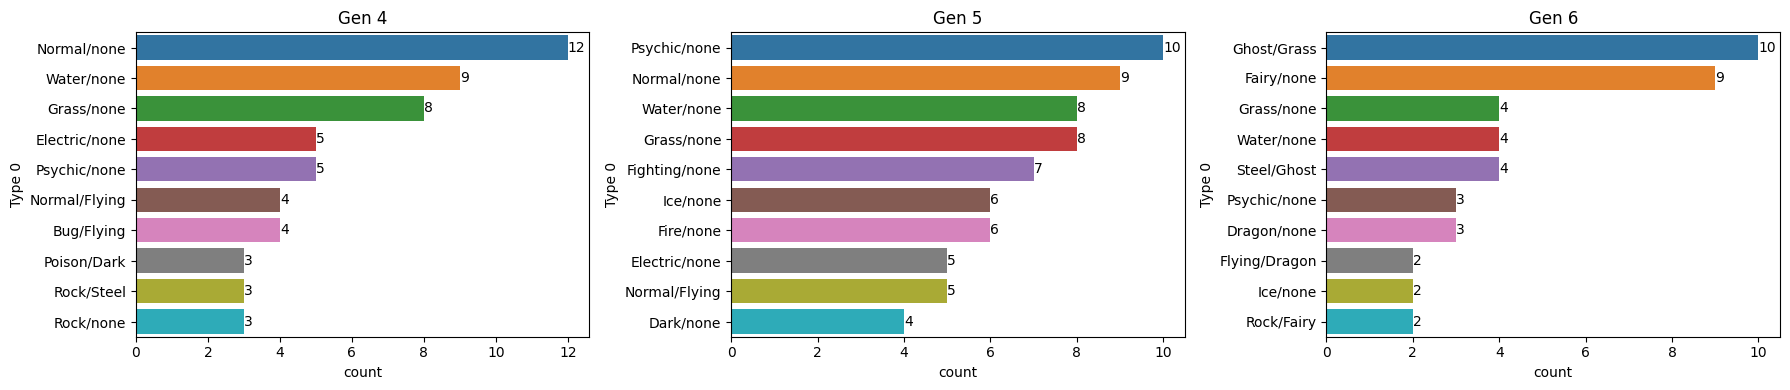

In [32]:
##gen4, gen5, and gen6 side by side
plt.rcParams["figure.figsize"] = [18.00, 4.00]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(nrows=1, ncols=3)

gen4ctypes = sns.countplot(y='Type 0', data=gen4, order= gen4['Type 0'].value_counts().nlargest(n=10).index, ax= ax[0])
gen4ctypes.bar_label(gen4ctypes.containers[0]);
gen4ctypes.set_title('Gen 4')

gen5ctypes = sns.countplot(y='Type 0', data=gen5, order= gen5['Type 0'].value_counts().nlargest(n=10).index, ax= ax[1])
gen5ctypes.bar_label(gen5ctypes.containers[0]);
gen5ctypes.set_title('Gen 5')

gen6ctypes = sns.countplot(y='Type 0', data=gen6, order= gen6['Type 0'].value_counts().nlargest(n=10).index, ax = ax[2])
gen6ctypes.bar_label(gen6ctypes.containers[0]);
gen6ctypes.set_title('Gen 6')

In [33]:
##that's curious that gen5 and gen6 are different
##let's look into that

In [34]:
pm_2.loc[(pm_2['Generation']==5) & (pm_2['Type 0']=='Psychic/none')]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0,average_skp,count
576,517,Munna,Psychic,none,292,76,25,45,67,55,24,5,False,Psychic/none,48.666667,1
577,518,Musharna,Psychic,none,487,116,55,85,107,95,29,5,False,Psychic/none,81.166667,1
635,574,Gothita,Psychic,none,290,45,30,50,55,65,45,5,False,Psychic/none,48.333333,1
636,575,Gothorita,Psychic,none,390,60,45,70,75,85,55,5,False,Psychic/none,65.000000,1
637,576,Gothitelle,Psychic,none,490,70,55,95,95,110,65,5,False,Psychic/none,81.666667,1
638,577,Solosis,Psychic,none,290,45,30,40,105,50,20,5,False,Psychic/none,48.333333,1
639,578,Duosion,Psychic,none,370,65,40,50,125,60,30,5,False,Psychic/none,61.666667,1
640,579,Reuniclus,Psychic,none,490,110,65,75,125,85,30,5,False,Psychic/none,81.666667,1
666,605,Elgyem,Psychic,none,335,55,55,55,85,55,30,5,False,Psychic/none,55.833333,1
667,606,Beheeyem,Psychic,none,485,75,75,75,125,95,40,5,False,Psychic/none,80.833333,1


In [37]:
##okay so gen5 checks out--just a lot of psychic pokemon

In [38]:
pm_2.loc[(pm_2['Generation']==6) & (pm_2['Type 0']=='Ghost/Grass')]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0,average_skp,count
778,708,Phantump,Ghost,Grass,309,43,70,48,50,60,38,6,False,Ghost/Grass,51.500000,1
779,709,Trevenant,Ghost,Grass,474,85,110,76,65,82,56,6,False,Ghost/Grass,79.000000,1
780,710,PumpkabooAverage Size,Ghost,Grass,335,49,66,70,44,55,51,6,False,Ghost/Grass,55.833333,1
781,710,PumpkabooSmall Size,Ghost,Grass,335,44,66,70,44,55,56,6,False,Ghost/Grass,55.833333,1
782,710,PumpkabooLarge Size,Ghost,Grass,335,54,66,70,44,55,46,6,False,Ghost/Grass,55.833333,1
783,710,PumpkabooSuper Size,Ghost,Grass,335,59,66,70,44,55,41,6,False,Ghost/Grass,55.833333,1
784,711,GourgeistAverage Size,Ghost,Grass,494,65,90,122,58,75,84,6,False,Ghost/Grass,82.333333,1
785,711,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6,False,Ghost/Grass,82.333333,1
786,711,GourgeistLarge Size,Ghost,Grass,494,75,95,122,58,75,69,6,False,Ghost/Grass,82.333333,1
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False,Ghost/Grass,82.333333,1


In [39]:
##ah...let's just take one Pumpkaboo and one Gourgeist--the average sized ones
gen6_edit= gen6.drop([781, 782, 783, 785, 786, 787])

In [40]:
##redo this without the duplicate Pumpkaboos and Gourgeists
pd.set_option('display.max_rows', 10)
gen6_edit.groupby(['Type 0'], dropna='False').count().sort_values('#', ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,average_skp,count
Type 0,,,,,,,,,,,,,,,
Fairy/none,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Water/none,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Grass/none,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Steel/Ghost,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Ghost/Grass,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fighting/Dark,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Electric/Fairy,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Dragon/Ground,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [41]:
##that looks much better
##BUT--sanity check of fairy type
pm_2.loc[(pm_2['Generation']==6) & (pm_2['Type 0']=='Fairy/none')]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0,average_skp,count
737,669,Flabébé,Fairy,none,303,44,38,39,61,79,42,6,False,Fairy/none,50.500000,1
738,670,Floette,Fairy,none,371,54,45,47,75,98,52,6,False,Fairy/none,61.833333,1
739,671,Florges,Fairy,none,552,78,65,68,112,154,75,6,False,Fairy/none,92.000000,1
752,682,Spritzee,Fairy,none,341,78,52,60,63,65,23,6,False,Fairy/none,56.833333,1
753,683,Aromatisse,Fairy,none,462,101,72,72,99,89,29,6,False,Fairy/none,77.000000,1
754,684,Swirlix,Fairy,none,341,62,48,66,59,57,49,6,False,Fairy/none,56.833333,1
755,685,Slurpuff,Fairy,none,480,82,80,86,85,75,72,6,False,Fairy/none,80.000000,1
770,700,Sylveon,Fairy,none,525,95,65,65,110,130,60,6,False,Fairy/none,87.500000,1
792,716,Xerneas,Fairy,none,680,126,131,95,131,98,99,6,True,Fairy/none,113.333333,1


In [42]:
##cool now let's fix that visual of gen4,5,and 6

Text(0.5, 1.0, 'Gen 6')

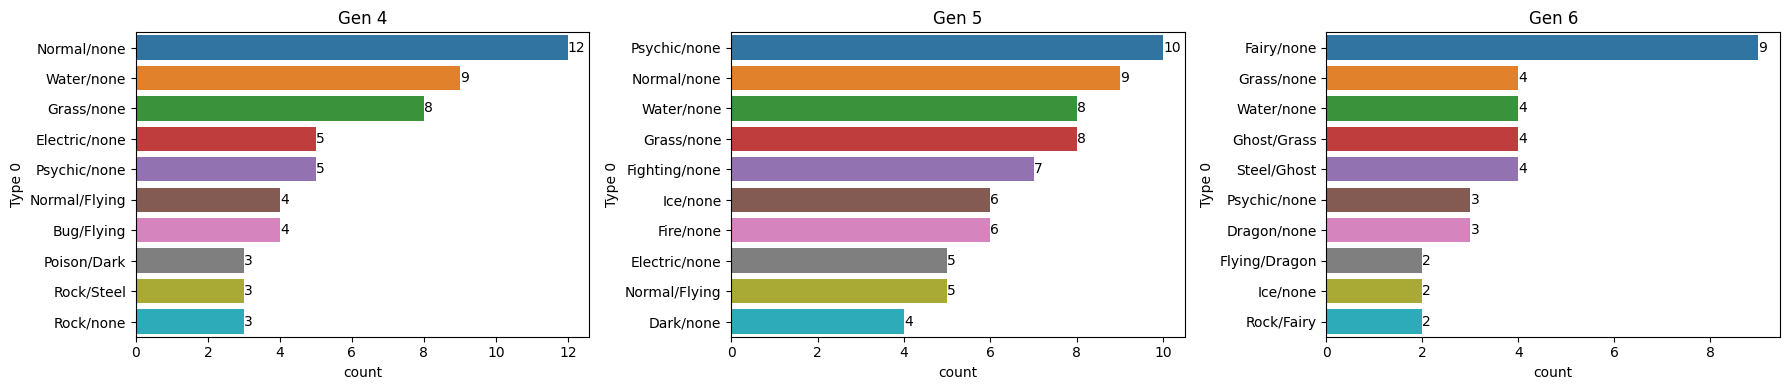

In [43]:
##gen4, gen5, and gen6 side by side
plt.rcParams["figure.figsize"] = [18.00, 4.00]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(nrows=1, ncols=3)

gen4ctypes = sns.countplot(y='Type 0', data=gen4, order= gen4['Type 0'].value_counts().nlargest(n=10).index, ax= ax[0])
gen4ctypes.bar_label(gen4ctypes.containers[0]);
gen4ctypes.set_title('Gen 4')

gen5ctypes = sns.countplot(y='Type 0', data=gen5, order= gen5['Type 0'].value_counts().nlargest(n=10).index, ax= ax[1])
gen5ctypes.bar_label(gen5ctypes.containers[0]);
gen5ctypes.set_title('Gen 5')

gen6_editctypes = sns.countplot(y='Type 0', data=gen6_edit, order= gen6_edit['Type 0'].value_counts().nlargest(n=10).index, ax = ax[2])
gen6_editctypes.bar_label(gen6_editctypes.containers[0]);
gen6_editctypes.set_title('Gen 6')

<a id="subsection-c"></a>
**C. How do stats vary across generations and between legendary and non-legendary Pokemon?**

In [44]:
##the overall stats of non-mega pokemon were already shown when comparing them to the mega pokemon stats, but here is a refresher
pm_2.loc[:,['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed','average_skp']].describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,average_skp
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,423.457447,68.684840,75.986702,71.781915,70.230053,70.148936,66.625000,70.576241
std,112.918614,25.932164,29.901433,29.628059,30.247299,27.404533,27.831341,18.819769
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,30.000000
25%,325.000000,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,54.166667
50%,430.000000,65.000000,75.000000,68.000000,65.000000,65.000000,65.000000,71.666667
75%,500.000000,80.000000,95.000000,90.000000,90.000000,85.000000,88.250000,83.333333
max,770.000000,255.000000,180.000000,230.000000,180.000000,230.000000,180.000000,128.333333


<AxesSubplot:xlabel='average_skp', ylabel='Generation'>

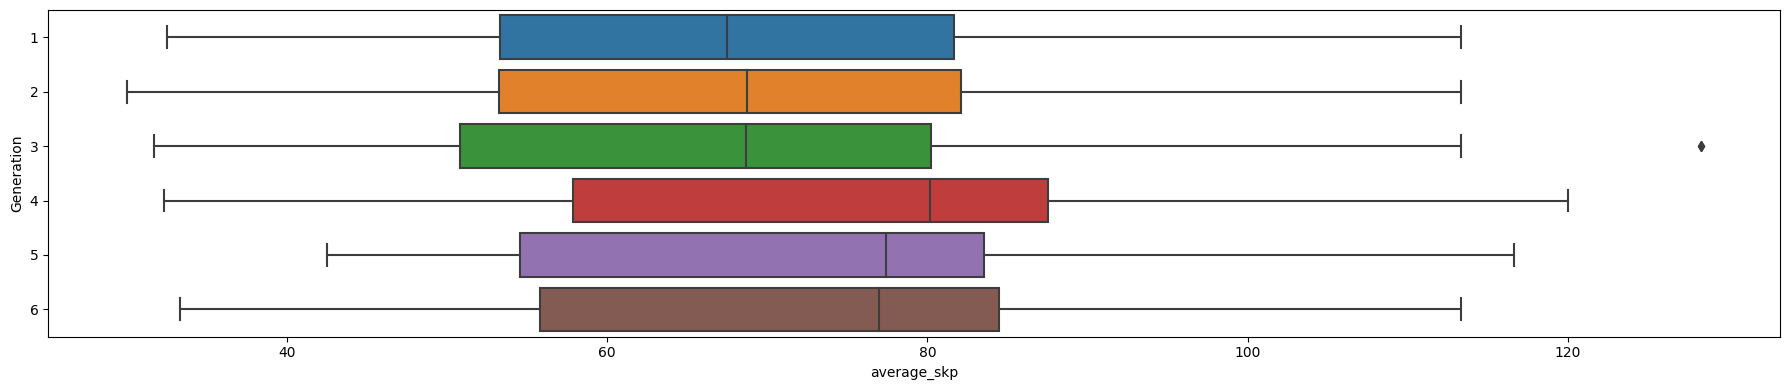

In [45]:
##visualize average skill points by generation
sns.boxplot(x='average_skp', y='Generation', data= pm_2, orient='h')

Text(0.5, 1.0, 'Sp. Atk')

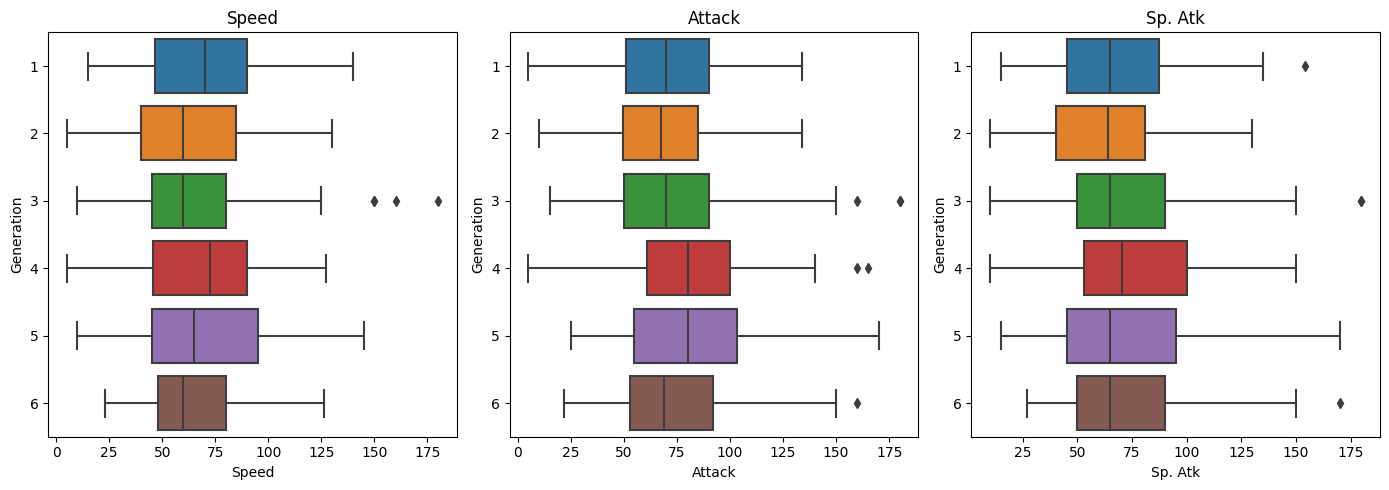

In [46]:
##breakdown of skill points per generation

plt.rcParams["figure.figsize"] = [14.00, 5.00]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(nrows=1, ncols=3)

spbp= sns.boxplot(x='Speed', y='Generation', data= pm_2, orient='h',ax= ax[0])
spbp.set_title('Speed')

abp= sns.boxplot(x='Attack', y='Generation', data= pm_2, orient='h',ax= ax[1])
abp.set_title('Attack')

sabp= sns.boxplot(x='Sp. Atk', y='Generation', data= pm_2, orient='h', ax= ax[2])
sabp.set_title('Sp. Atk')

Text(0.5, 1.0, 'Sp. Def')

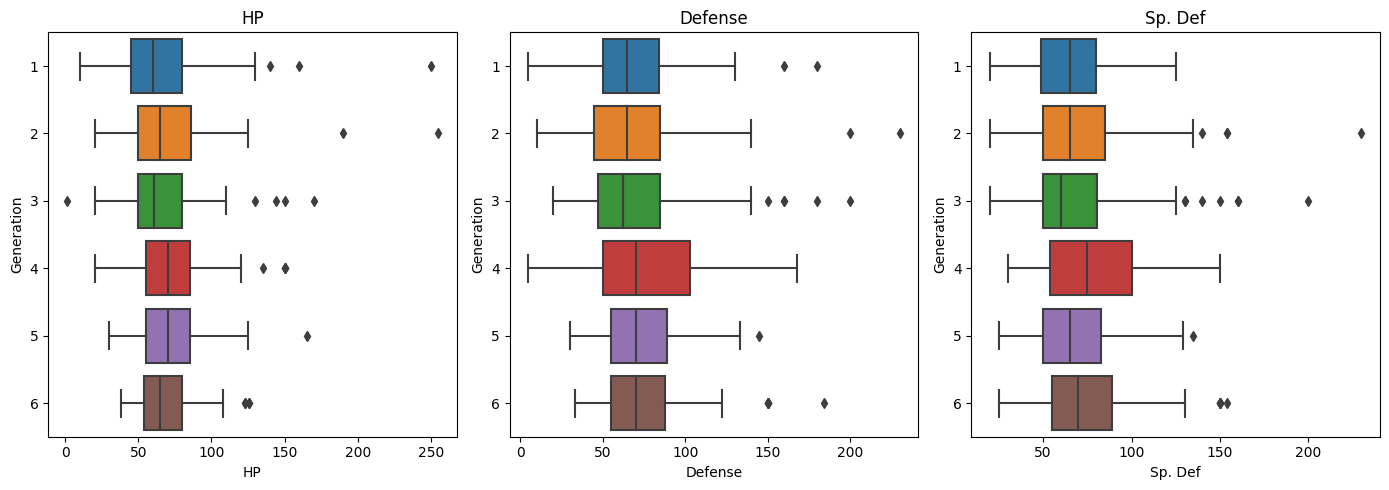

In [47]:
plt.rcParams["figure.figsize"] = [14.00, 5.00]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(nrows=1, ncols=3)

hpbp= sns.boxplot(x='HP', y='Generation', data= pm_2, orient='h',ax= ax[0])
hpbp.set_title('HP')

dbp= sns.boxplot(x='Defense', y='Generation', data= pm_2, orient='h',ax= ax[1])
dbp.set_title('Defense')

sdbp= sns.boxplot(x='Sp. Def', y='Generation', data= pm_2, orient='h', ax= ax[2])
sdbp.set_title('Sp. Def')

In [48]:
##stats for legendary pokemon
pm_2_leg= pm_2.loc[(pm_2['Legendary'])==True]
pm_2_leg.loc[:,['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']].describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,626.949153,93.237288,113.118644,99.627119,117.864407,104.847458,98.254237
std,52.267688,21.786851,27.968014,29.270968,28.806404,29.562799,22.936639
min,580.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000
25%,580.000000,80.000000,92.500000,87.500000,100.000000,90.000000,90.000000
50%,600.000000,91.000000,110.000000,95.000000,120.000000,100.000000,95.000000
75%,680.000000,102.500000,129.500000,117.500000,133.000000,120.000000,109.000000
max,770.000000,150.000000,180.000000,200.000000,180.000000,200.000000,180.000000


In [49]:
##stats for regular non-legendary pokemon
pm_2_reg = pm_2.loc[(pm_2['Legendary'])==False]
pm_2_reg.loc[:,['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']].describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000
mean,406.132756,66.594517,72.825397,69.411255,66.174603,67.194805,63.932179
std,98.882015,25.184437,27.878345,28.445003,26.710011,25.107707,26.532503
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,318.000000,50.000000,52.000000,50.000000,45.000000,50.000000,45.000000
50%,413.000000,64.000000,70.000000,65.000000,61.000000,65.000000,60.000000
75%,490.000000,78.000000,90.000000,85.000000,85.000000,80.000000,84.000000
max,670.000000,255.000000,165.000000,230.000000,150.000000,230.000000,160.000000


In [50]:
##legendary counts
pm_2_leg.groupby(['Generation'], dropna='False').nunique()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Type 0,average_skp,count
Generation,,,,,,,,,,,,,,,
1,4,4,4,2,2,2,4,3,3,3,4,1,4,2,1
2,5,5,4,2,2,4,5,5,3,4,5,1,5,2,1
3,10,15,7,4,5,4,9,9,9,10,7,1,10,5,1
4,11,13,8,4,5,9,8,9,9,9,9,1,9,5,1
5,10,15,8,6,5,5,11,7,12,6,8,1,10,5,1
6,6,7,6,7,2,4,4,5,6,5,5,1,7,2,1


In [51]:
##wow okay
# gen1 4
# gen2 5
# gen3 10
# gen4 11
# gen5 10
# gen6 6

#gen1 has the least and gen4 has the most
#gen6 goes back to a smaller number

In [52]:
##what are the gen4 legendaries? 
pd.set_option('display.max_rows', 50)
pm_2_leg.loc[(pm_2_leg['Generation']==4)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0,average_skp,count
537,480,Uxie,Psychic,none,580,75,75,130,75,130,95,4,True,Psychic/none,96.666667,1
538,481,Mesprit,Psychic,none,580,80,105,105,105,105,80,4,True,Psychic/none,96.666667,1
539,482,Azelf,Psychic,none,580,75,125,70,125,70,115,4,True,Psychic/none,96.666667,1
540,483,Dialga,Steel,Dragon,680,100,120,120,150,100,90,4,True,Steel/Dragon,113.333333,1
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True,Water/Dragon,113.333333,1
542,485,Heatran,Fire,Steel,600,91,90,106,130,106,77,4,True,Fire/Steel,100.000000,1
543,486,Regigigas,Normal,none,670,110,160,110,80,110,100,4,True,Normal/none,111.666667,1
544,487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True,Ghost/Dragon,113.333333,1
545,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True,Ghost/Dragon,113.333333,1
549,491,Darkrai,Dark,none,600,70,90,90,135,90,125,4,True,Dark/none,100.000000,1


<AxesSubplot:xlabel='Generation', ylabel='average_skp'>

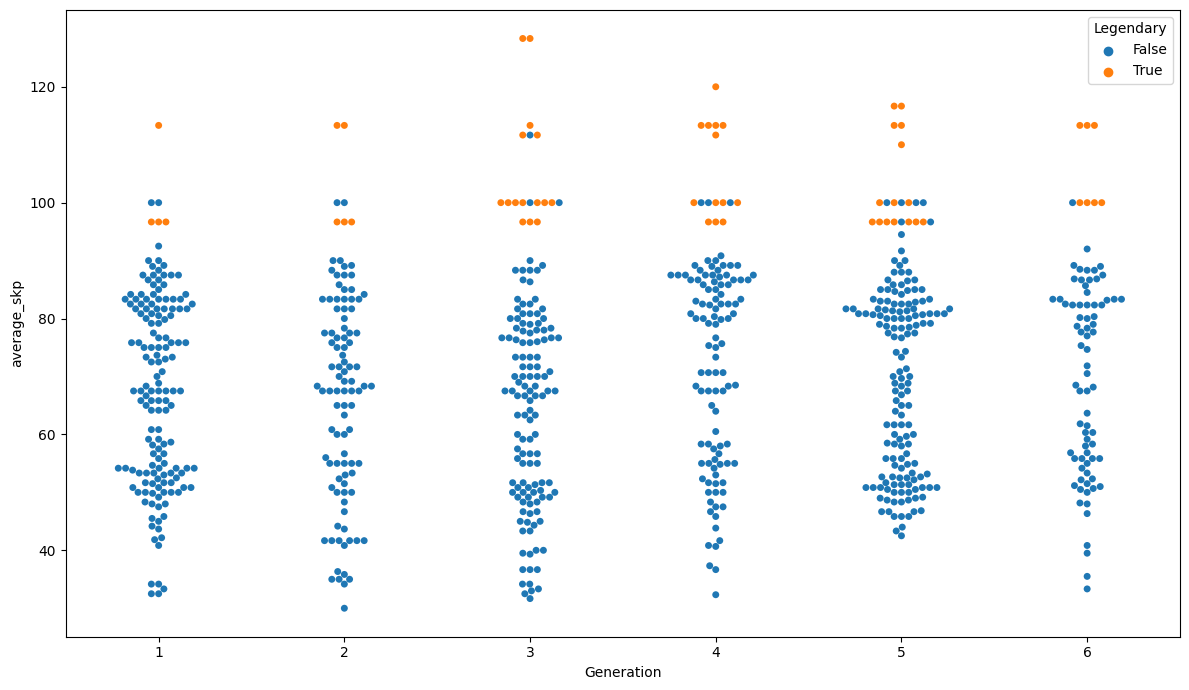

In [53]:
##total skill points by generation legendary v non-legendary
plt.rcParams["figure.figsize"] = [12.00, 7.00]
sns.swarmplot(x='Generation', y='average_skp', data=pm_2, hue='Legendary')

In [54]:
##generally speaking the legendary pokemon have higher average skill points

<AxesSubplot:xlabel='Generation', ylabel='HP'>

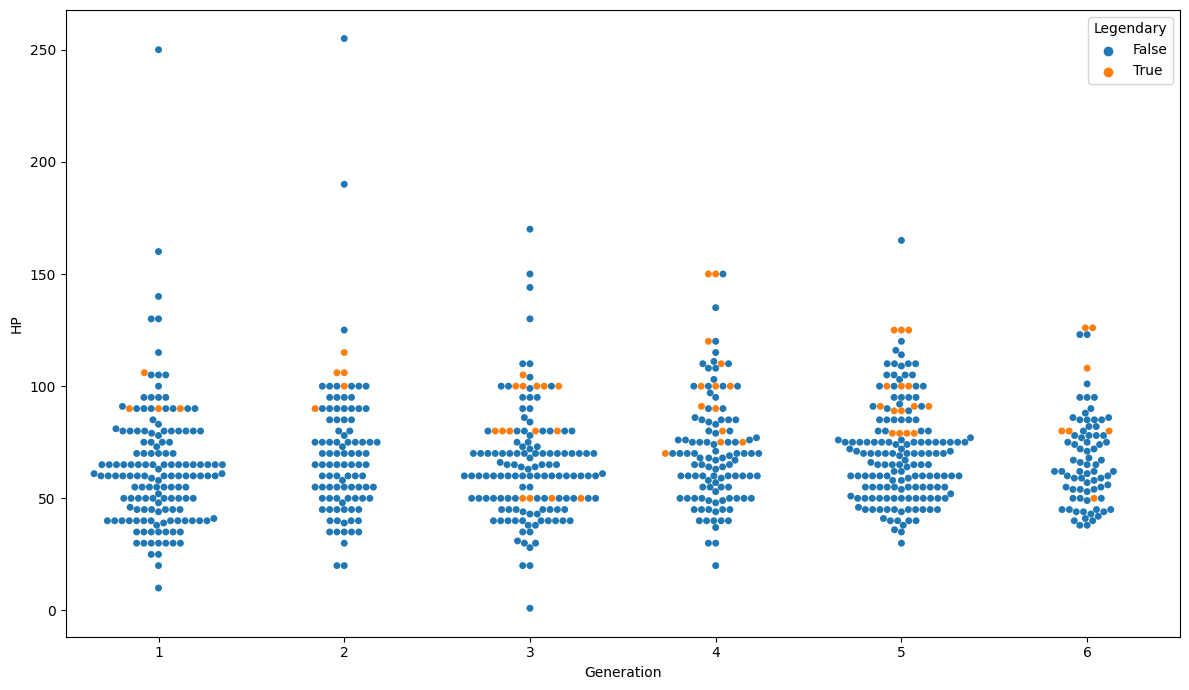

In [55]:
sns.swarmplot(x='Generation', y='HP', data=pm_2, hue='Legendary')

In [56]:
##the HP of the legendaries seems to be more variable--especially from gen3 onward
##there are also more legendary pokemon from gen3 onward--we will look at the exact counts 

<AxesSubplot:xlabel='Generation', ylabel='Attack'>

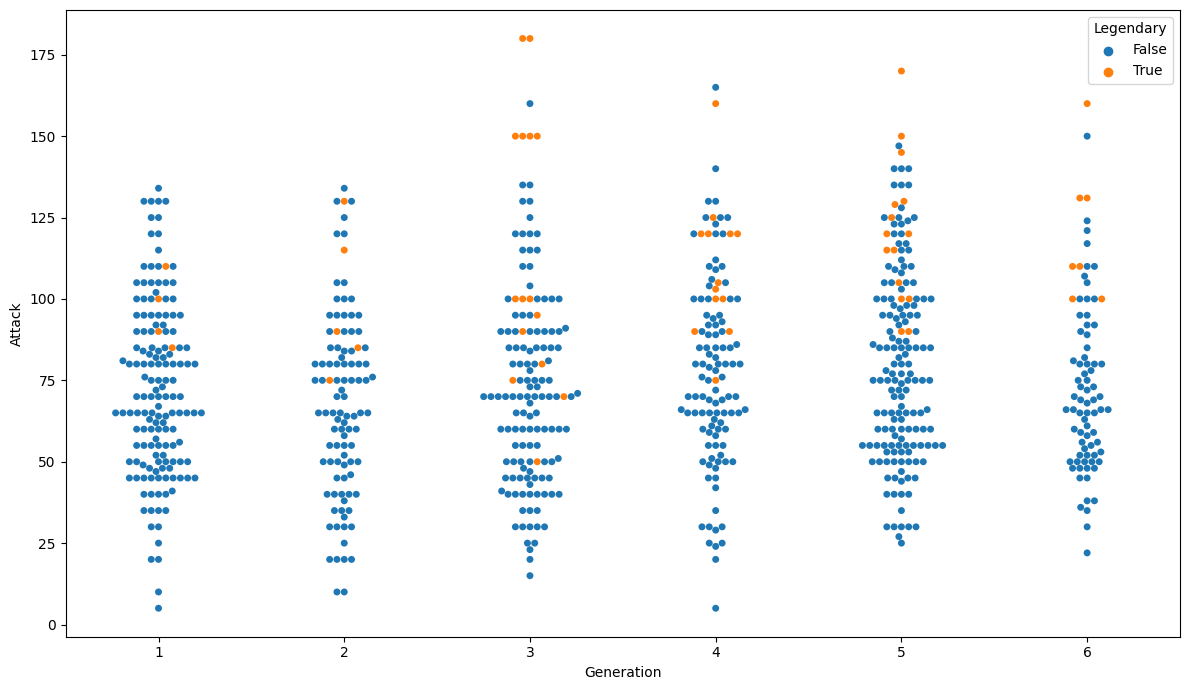

In [57]:
sns.swarmplot(x='Generation', y='Attack', data=pm_2, hue='Legendary')

In [58]:
##hm gen3 has a legendary with an unusually low attack

<AxesSubplot:xlabel='Generation', ylabel='Defense'>

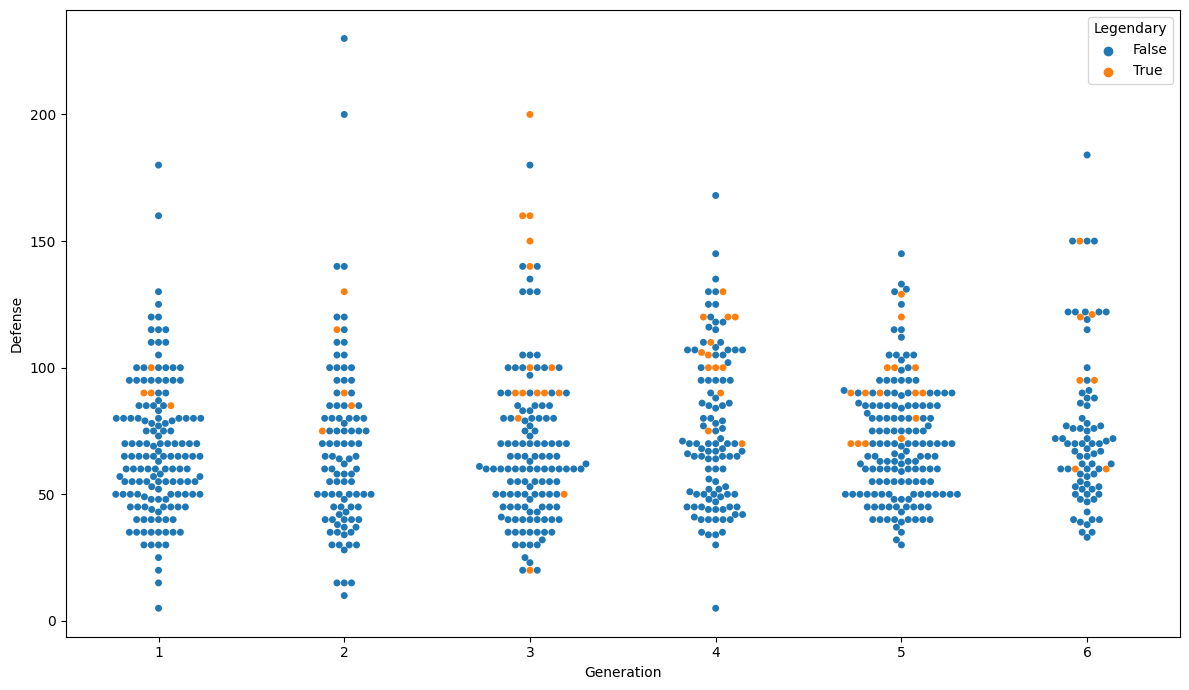

In [59]:
sns.swarmplot(x='Generation', y='Defense', data=pm_2, hue='Legendary')

In [60]:
##annnd gen3 has a legendary with an unusually low defense-- we will take a more in-depth look at gen3 legendaries

<AxesSubplot:xlabel='Generation', ylabel='Speed'>

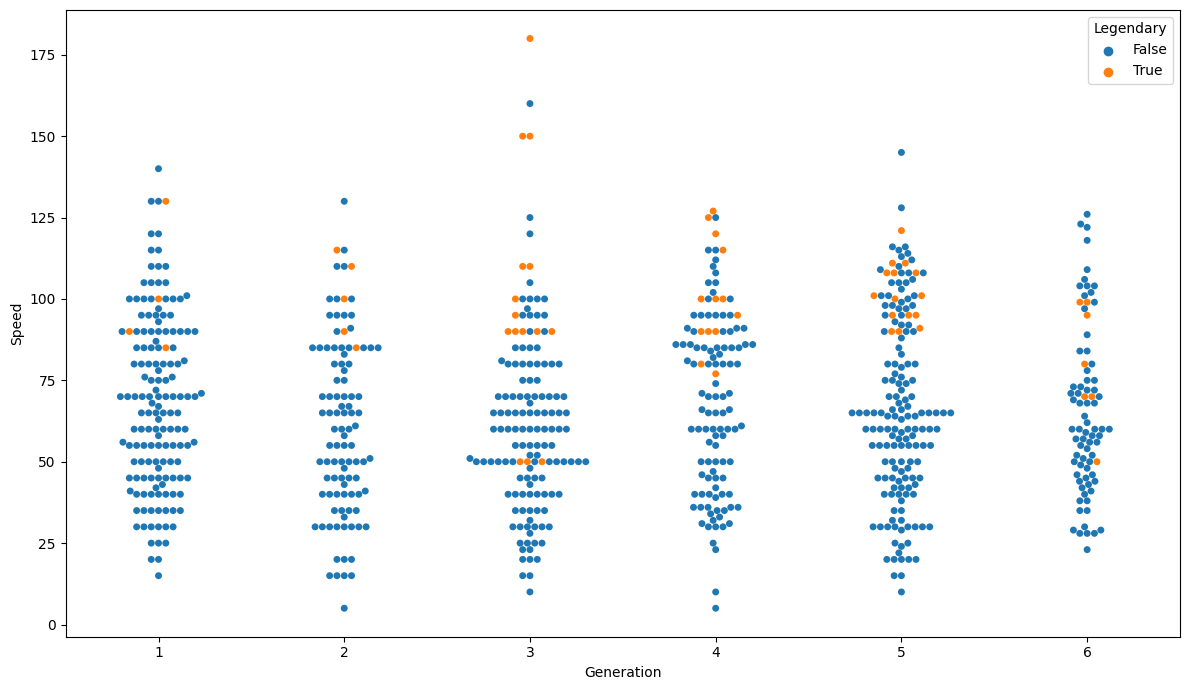

In [61]:
sns.swarmplot(x='Generation', y='Speed', data=pm_2, hue='Legendary')

<AxesSubplot:xlabel='Generation', ylabel='Sp. Atk'>

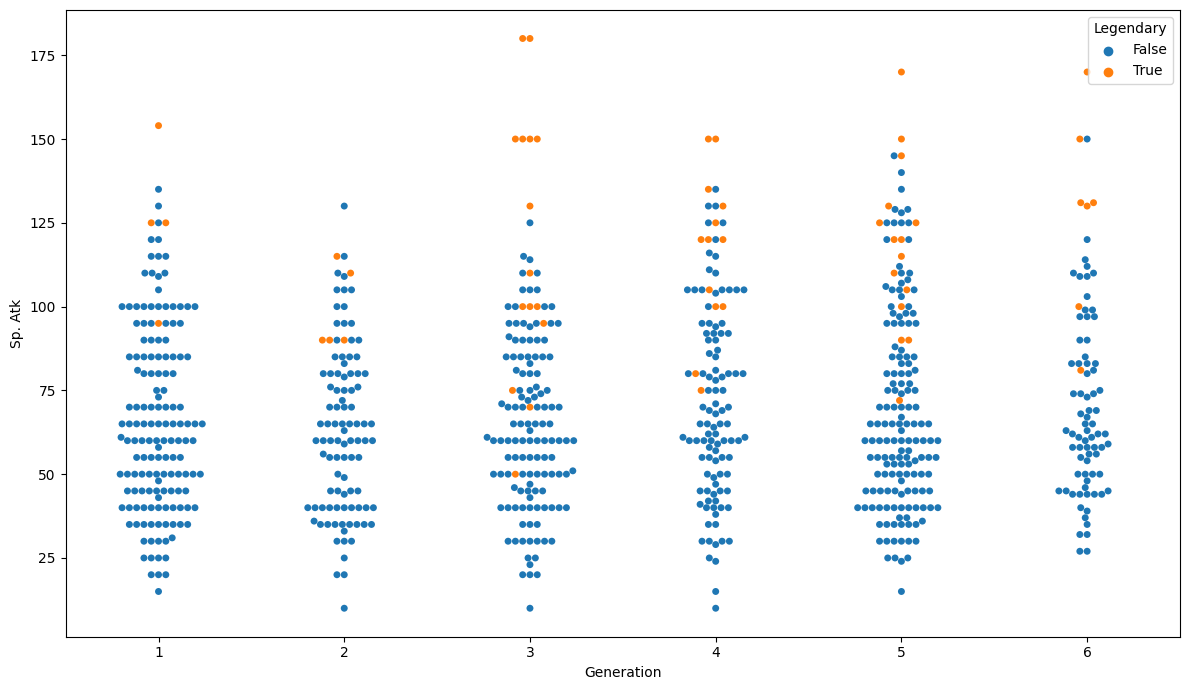

In [62]:
sns.swarmplot(x='Generation', y='Sp. Atk', data=pm_2, hue='Legendary')

<AxesSubplot:xlabel='Generation', ylabel='Sp. Def'>

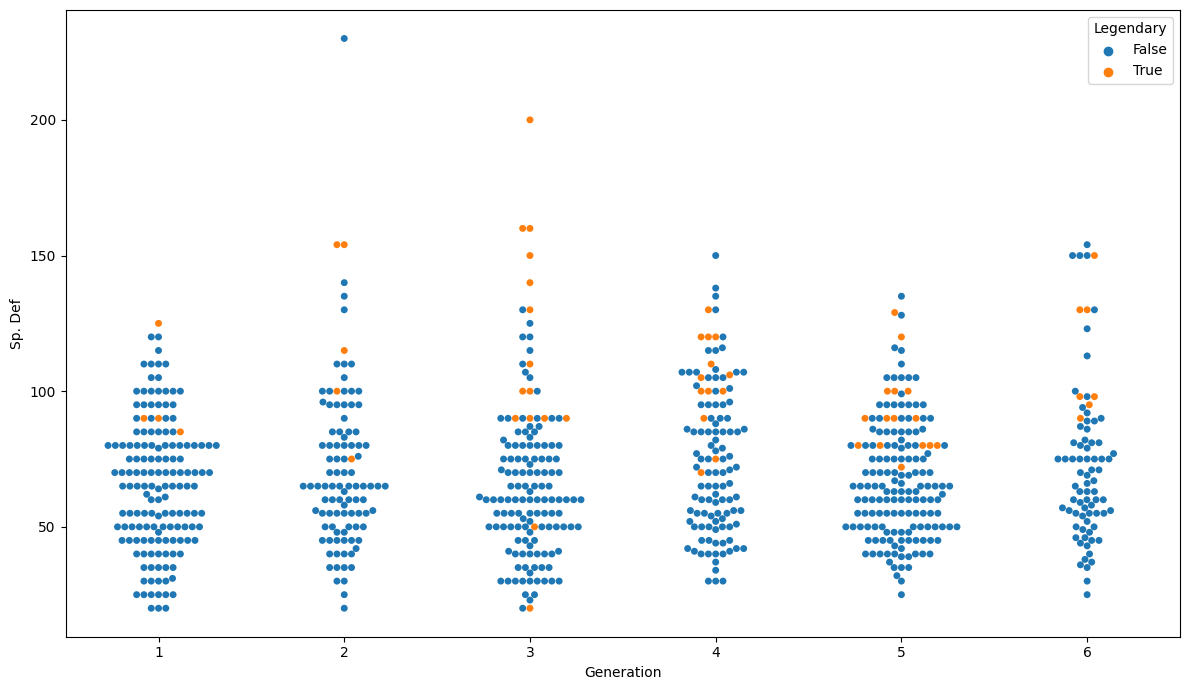

In [63]:
sns.swarmplot(x='Generation', y='Sp. Def', data=pm_2, hue='Legendary')

In [64]:
##okay let's take a closer look at the gen3 legendaries

pm_2.loc[(pm_2['Generation']==3)& (pm_2['Legendary']==True)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0,average_skp,count
414,377,Regirock,Rock,none,580,80,100,200,50,100,50,3,True,Rock/none,96.666667,1
415,378,Regice,Ice,none,580,80,50,100,100,200,50,3,True,Ice/none,96.666667,1
416,379,Registeel,Steel,none,580,80,75,150,75,150,50,3,True,Steel/none,96.666667,1
417,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True,Dragon/Psychic,100.000000,1
419,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True,Dragon/Psychic,100.000000,1
421,382,Kyogre,Water,none,670,100,100,90,150,140,90,3,True,Water/none,111.666667,1
422,382,KyogrePrimal Kyogre,Water,none,770,100,150,90,180,160,90,3,True,Water/none,128.333333,1
423,383,Groudon,Ground,none,670,100,150,140,100,90,90,3,True,Ground/none,111.666667,1
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,Ground/Fire,128.333333,1
425,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True,Dragon/Flying,113.333333,1


In [65]:
##ah-ha!  Deoxys has different forms focusing on specific skills--that explains why there were legendaries with such low skill points
## DeoxysAttack Forme only has a def and sp def of 20
## additoinally Regirock and Regice respectively have the lowest sp atk and attack of the gen3 legendaries
## Regirock and Regice, however, respectively have exceptional defense and sp. defense

<a id="part-two"></a>
### II. Comparison of Starter Pokemon



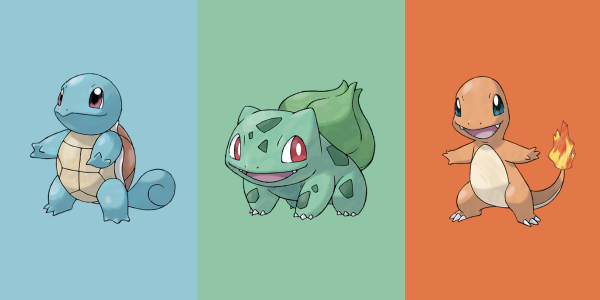

***Questions:***

Which generation has the best starters at stage 1, 2, and 3? <br>
Which is the best pokemon at stage 1, 2, and 3? <br>
Which pokemon is the best based on type? Grass, water, and fire <br>


In [66]:
# how do we define the "best"?
# highest avg skill points for our purposes
# people play pokemon and create their team differently 
# some people want a balanced starter, some want a tank to steam roll over everything
# this isn't a definitive answer- just one possible answer to this question

In [67]:
# ##Starter pokemon and subsequent evolutions for each gen

#    GRASS        FIRE       WATER

# 1 Bulbasaur, Charmander, Squirtle
#   Ivysaur, Charmeleon, Wartortle
#   Venusaur, Charizard, Blastoise

# 2 Chikorita, Cyndaquil, Totodile
#   Bayleef, Quilava, Croconaw
#   Meganium, Typhlosion, Feraligatr

# 3 Treecko, Torchic, Mudkip
#   Grovyle, Combusken, Marshtomp
#   Sceptile, Blaziken, Swampert

# 4 Turtwig, Chimchar, Piplup
#   Grotle, Monferno, Prinplup
#   Torterra, Infernape, Empoleon

# 5 Snivy, Tepig, Oshawott
#   Servine, Pignite, Dewott
#   Serperior, Emboar, Samurott

# 6 Chespin, Fennekin, Froakie
#   Quilladin, Braixen, Frogadier
#   Chesnaught, Delphox, Greninja

In [68]:
##make a df of just the starters
starters = pm_2.loc[[0,1,2,4,5,6,9,10,11,166,167,168,169,170,171,172,173,174,272,273,274,276,277,278,280,281,282,432,433,434,435,436,437,438,439,440,554,555,556,557,558,559,560,561,562,718,719,720,721,722,723,724,725,726],:]

In [69]:
print(starters)

       #        Name Type 1   Type 2  Total  HP  Attack  Defense  Sp. Atk  \
0      1   Bulbasaur  Grass   Poison    318  45      49       49       65   
1      2     Ivysaur  Grass   Poison    405  60      62       63       80   
2      3    Venusaur  Grass   Poison    525  80      82       83      100   
4      4  Charmander   Fire     none    309  39      52       43       60   
5      5  Charmeleon   Fire     none    405  58      64       58       80   
..   ...         ...    ...      ...    ...  ..     ...      ...      ...   
722  654     Braixen   Fire     none    409  59      59       58       90   
723  655     Delphox   Fire  Psychic    534  75      69       72      114   
724  656     Froakie  Water     none    314  41      56       40       62   
725  657   Frogadier  Water     none    405  54      63       52       83   
726  658    Greninja  Water     Dark    530  72      95       67      103   

     Sp. Def  Speed  Generation  Legendary        Type 0  average_skp  coun

In [70]:
##add an evolution stage column
x = np.array([1,2,3])
stage_num = np.tile(x,18)
starters['stage']= stage_num.tolist() 

In [71]:
starters.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0,average_skp,count,stage
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass/Poison,53.0,1,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass/Poison,67.5,1,2
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass/Poison,87.5,1,3
4,4,Charmander,Fire,none,309,39,52,43,60,50,65,1,False,Fire/none,51.5,1,1
5,5,Charmeleon,Fire,none,405,58,64,58,80,65,80,1,False,Fire/none,67.5,1,2


<a id="subsection-aa"></a>
**A. Stage 1**

In [72]:
##examine the starters at stage 1 across all 6 gens

st1 = starters.loc[starters['stage']==1]
print(st1)

       #        Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
0      1   Bulbasaur  Grass  Poison    318  45      49       49       65   
4      4  Charmander   Fire    none    309  39      52       43       60   
9      7    Squirtle  Water    none    314  44      48       65       50   
166  152   Chikorita  Grass    none    318  45      49       65       49   
169  155   Cyndaquil   Fire    none    309  39      52       43       60   
172  158    Totodile  Water    none    314  50      65       64       44   
272  252     Treecko  Grass    none    310  40      45       35       65   
276  255     Torchic   Fire    none    310  45      60       40       70   
280  258      Mudkip  Water    none    310  50      70       50       50   
432  387     Turtwig  Grass    none    318  55      68       64       45   
435  390    Chimchar   Fire    none    309  44      58       44       58   
438  393      Piplup  Water    none    314  53      51       53       61   
554  495    

In [73]:
##first impression/observations
# intersting that bulbasaur is the ONLY one with a second type
# gen5 starters have the lowest total all 3 have 308 total skill pts

In [74]:
st1.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,average_skp,count,stage
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0
mean,325.833333,311.722222,47.277778,55.111111,50.277778,55.666667,52.555556,50.833333,3.500000,51.953704,1.0,1.0
std,221.735468,3.722832,7.201352,7.984462,10.317350,8.506053,7.237340,12.358612,1.757338,0.620472,0.0,0.0
min,1.000000,307.000000,39.000000,45.000000,35.000000,44.000000,44.000000,31.000000,1.000000,51.166667,1.0,1.0
25%,155.750000,309.000000,41.750000,49.000000,43.000000,48.250000,45.750000,43.000000,2.000000,51.500000,1.0,1.0
50%,322.500000,310.000000,45.000000,53.500000,47.000000,59.000000,50.000000,45.000000,3.500000,51.666667,1.0,1.0
75%,497.250000,314.000000,52.250000,60.750000,61.750000,62.000000,55.750000,62.500000,5.000000,52.333333,1.0,1.0
max,656.000000,318.000000,65.000000,70.000000,65.000000,70.000000,65.000000,71.000000,6.000000,53.000000,1.0,1.0


In [75]:
st1.groupby(['Generation']).mean().sort_values('average_skp', ascending=False)

/tmp/ipykernel_18911/3271430778.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  st1.groupby(['Generation']).mean().sort_values('average_skp', ascending=False)


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,average_skp,count,stage
Generation,,,,,,,,,,,,
1,4.0,313.666667,42.666667,49.666667,52.333333,58.333333,59.666667,51.000000,0.0,52.277778,1.0,1.0
2,155.0,313.666667,44.666667,55.333333,57.333333,51.000000,54.333333,51.000000,0.0,52.277778,1.0,1.0
4,390.0,313.666667,50.666667,59.000000,53.666667,54.666667,51.666667,44.000000,0.0,52.277778,1.0,1.0
6,653.0,311.333333,45.666667,54.000000,48.333333,57.333333,49.666667,56.333333,0.0,51.888889,1.0,1.0
3,255.0,310.000000,45.000000,58.333333,41.666667,61.666667,51.666667,51.666667,0.0,51.666667,1.0,1.0
5,498.0,308.000000,55.000000,54.333333,48.333333,51.000000,48.333333,51.000000,0.0,51.333333,1.0,1.0


In [76]:
# category   gen with the highest mean

#total       (1,2,4)
#hp          5
#attack      4
#defense     2
#sp atk      3
#sp def      1
#speed       6
#average_skp (1,2,4)

#huh that's interesting--each group of starters is best at one skill- i wonder if that was intentional 
#perhaps even for this very question- so that no group of starters is significantly "better" than another

#for the purposes of this analysis we will say that 1,2,4 have the best st1 starters because they have the highest avg skill points


<AxesSubplot:xlabel='Generation', ylabel='Total'>

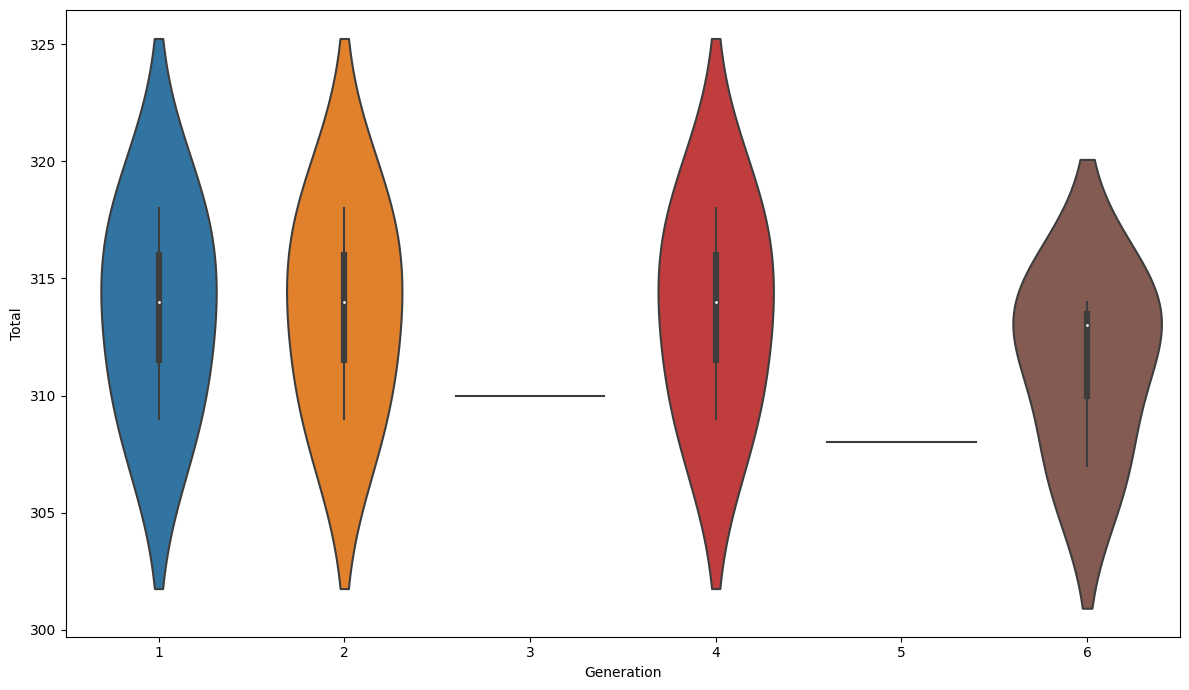

In [77]:
sns.violinplot(x='Generation', y='Total', data= st1)

In [78]:
#and if we want to take this a step further
deep = st1.loc[st1.Generation.isin([1,2,4])]

In [79]:
deep.groupby(['Generation']).mean().sort_values('average_skp', ascending=False)

/tmp/ipykernel_18911/15867771.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  deep.groupby(['Generation']).mean().sort_values('average_skp', ascending=False)


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,average_skp,count,stage
Generation,,,,,,,,,,,,
1,4.0,313.666667,42.666667,49.666667,52.333333,58.333333,59.666667,51.0,0.0,52.277778,1.0,1.0
2,155.0,313.666667,44.666667,55.333333,57.333333,51.000000,54.333333,51.0,0.0,52.277778,1.0,1.0
4,390.0,313.666667,50.666667,59.000000,53.666667,54.666667,51.666667,44.0,0.0,52.277778,1.0,1.0


In [80]:
# category   gen with the highest mean

#total      (1,2,4)
#hp         4
#attack     4
#defense    2
#sp atk     1
#sp def     1
#speed      (1,2)

#could argue that gen 1 has the best st1 starters because when compared to gen2 and gen4 it takes the top spot in 3 skill areas sp atk, sp def, and tied for top speed


In [81]:
##which stage1 starter pokemon is the best?
st1.sort_values('Total', ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0,average_skp,count,stage
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass/Poison,53.000000,1,1
166,152,Chikorita,Grass,none,318,45,49,65,49,65,45,2,False,Grass/none,53.000000,1,1
432,387,Turtwig,Grass,none,318,55,68,64,45,55,31,4,False,Grass/none,53.000000,1,1
9,7,Squirtle,Water,none,314,44,48,65,50,64,43,1,False,Water/none,52.333333,1,1
172,158,Totodile,Water,none,314,50,65,64,44,48,43,2,False,Water/none,52.333333,1,1
438,393,Piplup,Water,none,314,53,51,53,61,56,40,4,False,Water/none,52.333333,1,1
724,656,Froakie,Water,none,314,41,56,40,62,44,71,6,False,Water/none,52.333333,1,1
718,650,Chespin,Grass,none,313,56,61,65,48,45,38,6,False,Grass/none,52.166667,1,1
272,252,Treecko,Grass,none,310,40,45,35,65,55,70,3,False,Grass/none,51.666667,1,1
276,255,Torchic,Fire,none,310,45,60,40,70,50,45,3,False,Fire/none,51.666667,1,1


In [82]:
# STAGE 1
# INDIVIDUAL stats


# category   highest stat   pokemon with the highest stat
#              
# total      318            Bulbasaur, Chikorita, and Turtwig
# avg_skp    53             Bulbasaur, Chikorita, and Turtwig
# hp         65             Tepig
# attack     70             Mudkip
# defense    65             Squirtle, Chikorita, Chespin
# sp atk     70             Torchic
# sp DEF     65             Bulbasaur, Chikorita
# speed      71             Froakie


In [83]:
## i would say that Bulbasaur, Chikorita, and Turtwig are the "best" st1 starters
## one step further, chikorita is THE best bc it has the top spot in 3 skill areas avg_skp, tied for def, and tied for sp def

**B. Stage 2**

In [84]:
##examine the starters at stage 2 across all 6 gens

st2 = starters.loc[starters['stage']==2]
print(st2)

       #        Name Type 1    Type 2  Total  HP  Attack  Defense  Sp. Atk  \
1      2     Ivysaur  Grass    Poison    405  60      62       63       80   
5      5  Charmeleon   Fire      none    405  58      64       58       80   
10     8   Wartortle  Water      none    405  59      63       80       65   
167  153     Bayleef  Grass      none    405  60      62       80       63   
170  156     Quilava   Fire      none    405  58      64       58       80   
173  159    Croconaw  Water      none    405  65      80       80       59   
273  253     Grovyle  Grass      none    405  50      65       45       85   
277  256   Combusken   Fire  Fighting    405  60      85       60       85   
281  259   Marshtomp  Water    Ground    405  70      85       70       60   
433  388      Grotle  Grass      none    405  75      89       85       55   
436  391    Monferno   Fire  Fighting    405  64      78       52       78   
439  394    Prinplup  Water      none    405  64      66       6

In [85]:
##observations
##besides bulbasaur's st2 evolution ivysaur, there are 4 additional pokemon at st2 that aqcuire a second type
##the st2 starter pokemon of gen1,2,3,and 4 all have the same average_skp

In [86]:
st2.groupby(['Generation']).mean().sort_values('average_skp', ascending=False)

/tmp/ipykernel_18911/255936186.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  st2.groupby(['Generation']).mean().sort_values('average_skp', ascending=False)


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,average_skp,count,stage
Generation,,,,,,,,,,,,
5,499.0,414.666667,75.000000,76.000000,63.333333,71.000000,63.333333,66.000000,0.0,69.111111,1.0,2.0
6,654.0,406.333333,58.000000,66.666667,68.333333,76.333333,61.333333,75.666667,0.0,67.722222,1.0,2.0
1,5.0,405.000000,59.000000,63.000000,67.000000,75.000000,75.000000,66.000000,0.0,67.500000,1.0,2.0
2,156.0,405.000000,61.000000,68.666667,72.666667,67.333333,69.333333,66.000000,0.0,67.500000,1.0,2.0
3,256.0,405.000000,60.000000,78.333333,58.333333,76.666667,65.000000,66.666667,0.0,67.500000,1.0,2.0
4,391.0,405.000000,67.666667,77.666667,68.333333,71.333333,64.333333,55.666667,0.0,67.500000,1.0,2.0


<AxesSubplot:xlabel='Generation', ylabel='Total'>

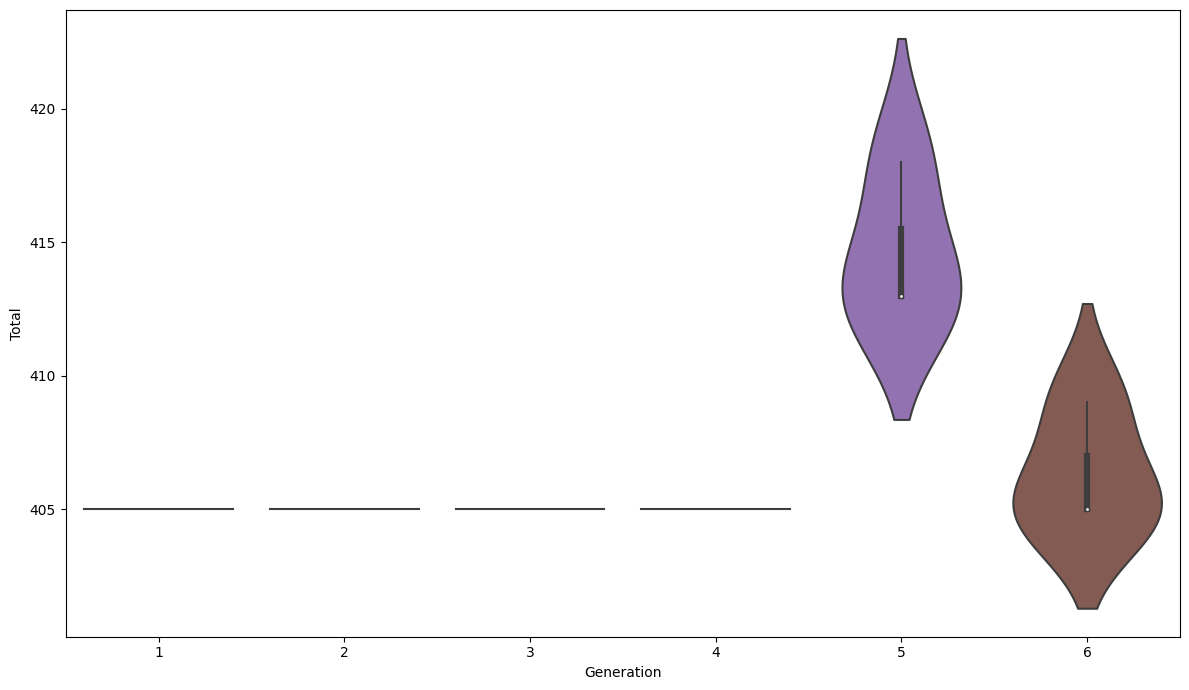

In [87]:
sns.violinplot(x='Generation', y='Total', data= st2)

In [88]:
st2.sort_values('average_skp', ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0,average_skp,count,stage
558,499,Pignite,Fire,Fighting,418,90,93,55,70,55,55,5,False,Fire/Fighting,69.666667,1,2
561,502,Dewott,Water,none,413,75,75,60,83,60,60,5,False,Water/none,68.833333,1,2
555,496,Servine,Grass,none,413,60,60,75,60,75,83,5,False,Grass/none,68.833333,1,2
722,654,Braixen,Fire,none,409,59,59,58,90,70,73,6,False,Fire/none,68.166667,1,2
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass/Poison,67.500000,1,2
5,5,Charmeleon,Fire,none,405,58,64,58,80,65,80,1,False,Fire/none,67.500000,1,2
719,651,Quilladin,Grass,none,405,61,78,95,56,58,57,6,False,Grass/none,67.500000,1,2
439,394,Prinplup,Water,none,405,64,66,68,81,76,50,4,False,Water/none,67.500000,1,2
436,391,Monferno,Fire,Fighting,405,64,78,52,78,52,81,4,False,Fire/Fighting,67.500000,1,2
433,388,Grotle,Grass,none,405,75,89,85,55,65,36,4,False,Grass/none,67.500000,1,2


In [89]:
## i would say that Pignite is the "best" st2 starters having the best avergae skill points and also the highest hp and attack
## and gen5 wins it for st2

In [90]:
# STAGE 2
# INDIVIDUAL stats

# category   highest stat   pokemon with the highest stat

# total      418            Pignite
# avg_skp    69.7           Pignite
# hp         90             Pignite
# attack     93             Pignite    
# defense    95             Quilladin    
# sp atk     90             Braixen  
# sp DEF     80             Ivysaur, Wartortle, Bayleaf  
# speed      97             Frogadier  

**C. Stage 3**

In [91]:
##examine the starters at stage 3 across all 6 gens

st3 = starters.loc[starters['stage']==3]
print(st3)


       #        Name Type 1    Type 2  Total   HP  Attack  Defense  Sp. Atk  \
2      3    Venusaur  Grass    Poison    525   80      82       83      100   
6      6   Charizard   Fire    Flying    534   78      84       78      109   
11     9   Blastoise  Water      none    530   79      83      100       85   
168  154    Meganium  Grass      none    525   80      82      100       83   
171  157  Typhlosion   Fire      none    534   78      84       78      109   
174  160  Feraligatr  Water      none    530   85     105      100       79   
274  254    Sceptile  Grass      none    530   70      85       65      105   
278  257    Blaziken   Fire  Fighting    530   80     120       70      110   
282  260    Swampert  Water    Ground    535  100     110       90       85   
434  389    Torterra  Grass    Ground    525   95     109      105       75   
437  392   Infernape   Fire  Fighting    534   76     104       71      104   
440  395    Empoleon  Water     Steel    530   84   

In [92]:
##observations
##at st3 there are 11 pokemon with a secondary type 
##fighting is the most common secondary type (if one exists)
##the st3 starter pokemon of gen5 all have the same average_skp

In [93]:
st3.groupby(['Generation']).mean().sort_values('average_skp', ascending=False)

/tmp/ipykernel_18911/3310032518.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  st3.groupby(['Generation']).mean().sort_values('average_skp', ascending=False)


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,average_skp,count,stage
Generation,,,,,,,,,,,,
3,257.0,531.666667,83.333333,105.000000,75.000000,100.000000,81.666667,86.666667,0.0,88.611111,1.0,3.0
6,655.0,531.333333,78.333333,90.333333,87.000000,97.000000,82.000000,96.666667,0.0,88.555556,1.0,3.0
1,6.0,529.666667,79.000000,83.000000,87.000000,98.000000,96.666667,86.000000,0.0,88.277778,1.0,3.0
2,157.0,529.666667,81.000000,90.333333,92.666667,90.333333,89.333333,86.000000,0.0,88.277778,1.0,3.0
4,392.0,529.666667,85.000000,99.666667,88.000000,96.666667,85.666667,74.666667,0.0,88.277778,1.0,3.0
5,500.0,528.000000,93.333333,99.333333,81.666667,94.333333,76.666667,82.666667,0.0,88.000000,1.0,3.0


<AxesSubplot:xlabel='Generation', ylabel='Total'>

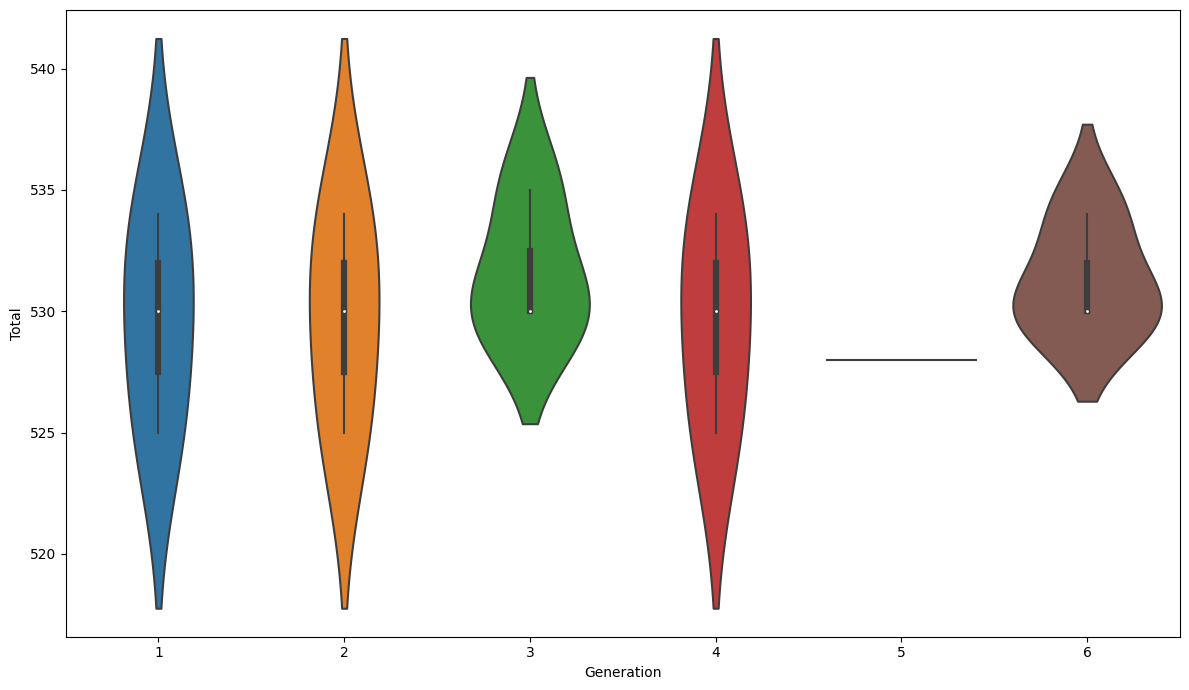

In [94]:
sns.violinplot(x='Generation', y='Total', data= st3)

In [95]:
st3.sort_values('average_skp', ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0,average_skp,count,stage
282,260,Swampert,Water,Ground,535,100,110,90,85,90,60,3,False,Water/Ground,89.166667,1,3
723,655,Delphox,Fire,Psychic,534,75,69,72,114,100,104,6,False,Fire/Psychic,89.000000,1,3
171,157,Typhlosion,Fire,none,534,78,84,78,109,85,100,2,False,Fire/none,89.000000,1,3
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Fire/Flying,89.000000,1,3
437,392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4,False,Fire/Fighting,89.000000,1,3
726,658,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False,Water/Dark,88.333333,1,3
720,652,Chesnaught,Grass,Fighting,530,88,107,122,74,75,64,6,False,Grass/Fighting,88.333333,1,3
11,9,Blastoise,Water,none,530,79,83,100,85,105,78,1,False,Water/none,88.333333,1,3
174,160,Feraligatr,Water,none,530,85,105,100,79,83,78,2,False,Water/none,88.333333,1,3
274,254,Sceptile,Grass,none,530,70,85,65,105,85,120,3,False,Grass/none,88.333333,1,3


In [96]:
# STAGE 3
# Highest INDIVIDUAL stats

# category   highest stat   pokemon with the highest stat

# total     535             Swampert 
# avg_skp   89.2            Swampert
# hp        110             Emboar 
# attack    123             Emboar    
# defense   122             Chesnaught
# sp atk    114             Delphox 
# sp DEF    105             Blastoise  
# speed     122             Greninja   

In [97]:
## i would say that Swampert is the "best" st3 starters
## and gen3 has the best st3 starters

In [98]:
##best starter pokemon by stage:
# st1 Bulbasaur, Chikorita, and Turtwig (or just Chikorita)
# st2 Pignite
# st3 Swampert

In [99]:
##also note
# Froakie- has the best speed at all 3 stages!
# Tepig- has the best hp at all 3 stages!

<AxesSubplot:xlabel='Generation', ylabel='Total'>

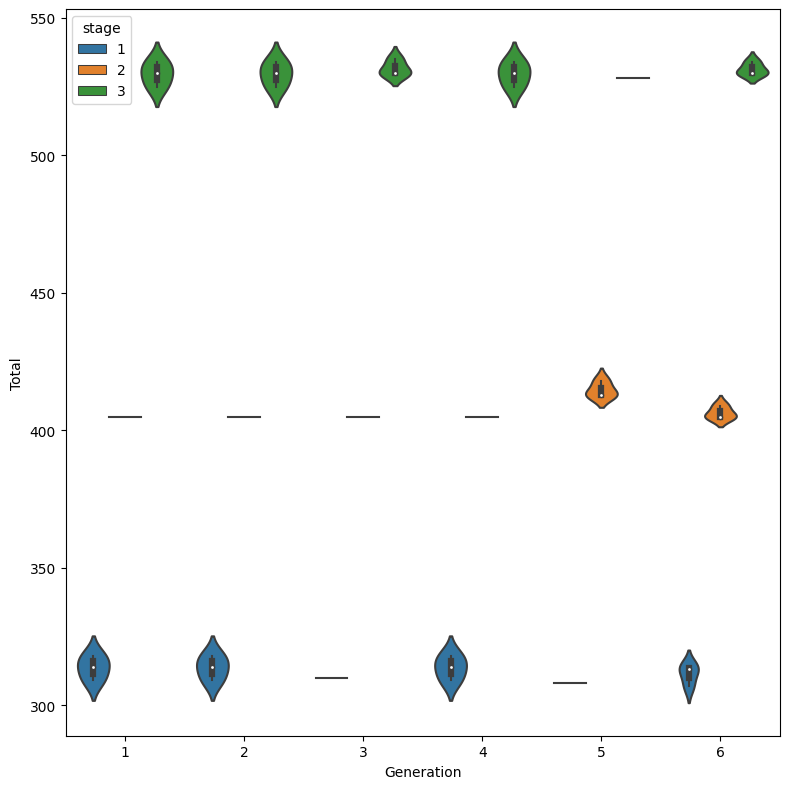

In [100]:
plt.rcParams["figure.figsize"] = [8.00, 8.00]
sns.violinplot(x='Generation', y='Total', data= starters, hue='stage')

<a id="subsection-dd"></a>
**D. Type (Grass, Water, Fire)**

In [101]:
##starters by type
#GRASS
stgr = starters.loc[starters['Type 1']=='Grass']
print(stgr)

       #        Name Type 1    Type 2  Total  HP  Attack  Defense  Sp. Atk  \
0      1   Bulbasaur  Grass    Poison    318  45      49       49       65   
1      2     Ivysaur  Grass    Poison    405  60      62       63       80   
2      3    Venusaur  Grass    Poison    525  80      82       83      100   
166  152   Chikorita  Grass      none    318  45      49       65       49   
167  153     Bayleef  Grass      none    405  60      62       80       63   
168  154    Meganium  Grass      none    525  80      82      100       83   
272  252     Treecko  Grass      none    310  40      45       35       65   
273  253     Grovyle  Grass      none    405  50      65       45       85   
274  254    Sceptile  Grass      none    530  70      85       65      105   
432  387     Turtwig  Grass      none    318  55      68       64       45   
433  388      Grotle  Grass      none    405  75      89       85       55   
434  389    Torterra  Grass    Ground    525  95     109      10

In [102]:
stgr.sort_values('average_skp', ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0,average_skp,count,stage
720,652,Chesnaught,Grass,Fighting,530,88,107,122,74,75,64,6,False,Grass/Fighting,88.333333,1,3
274,254,Sceptile,Grass,none,530,70,85,65,105,85,120,3,False,Grass/none,88.333333,1,3
556,497,Serperior,Grass,none,528,75,75,95,75,95,113,5,False,Grass/none,88.000000,1,3
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass/Poison,87.500000,1,3
168,154,Meganium,Grass,none,525,80,82,100,83,100,80,2,False,Grass/none,87.500000,1,3
434,389,Torterra,Grass,Ground,525,95,109,105,75,85,56,4,False,Grass/Ground,87.500000,1,3
555,496,Servine,Grass,none,413,60,60,75,60,75,83,5,False,Grass/none,68.833333,1,2
719,651,Quilladin,Grass,none,405,61,78,95,56,58,57,6,False,Grass/none,67.500000,1,2
167,153,Bayleef,Grass,none,405,60,62,80,63,80,60,2,False,Grass/none,67.500000,1,2
273,253,Grovyle,Grass,none,405,50,65,45,85,65,95,3,False,Grass/none,67.500000,1,2


In [103]:
# GRASS
# Highest INDIVIDUAL stats

# category   highest stat   pokemon with the highest stat

# total     530             Chesnaught, Sceptile 
# avg_skp   88.3            Chesnaught, Sceptile     
# hp        95              Torterra
# attack    109             Torterra   
# defense   122             Chesnaught
# sp atk    105             Sceptile
# sp DEF    100             Venusaur
# speed     120             Sceptile  


In [104]:
##best grass type is Chesnaught and Sceptile
##one step further, Sceptile is THE best bc it has the top spot in 3 skill areas speed, sp atk, and tied for highest avg_skp

In [105]:
#WATER
stw = starters.loc[starters['Type 1']=='Water']
print(stw)


       #        Name Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  \
9      7    Squirtle  Water    none    314   44      48       65       50   
10     8   Wartortle  Water    none    405   59      63       80       65   
11     9   Blastoise  Water    none    530   79      83      100       85   
172  158    Totodile  Water    none    314   50      65       64       44   
173  159    Croconaw  Water    none    405   65      80       80       59   
174  160  Feraligatr  Water    none    530   85     105      100       79   
280  258      Mudkip  Water    none    310   50      70       50       50   
281  259   Marshtomp  Water  Ground    405   70      85       70       60   
282  260    Swampert  Water  Ground    535  100     110       90       85   
438  393      Piplup  Water    none    314   53      51       53       61   
439  394    Prinplup  Water    none    405   64      66       68       81   
440  395    Empoleon  Water   Steel    530   84      86       88      111   

In [106]:
stw.sort_values('average_skp', ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0,average_skp,count,stage
282,260,Swampert,Water,Ground,535,100,110,90,85,90,60,3,False,Water/Ground,89.166667,1,3
726,658,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False,Water/Dark,88.333333,1,3
11,9,Blastoise,Water,none,530,79,83,100,85,105,78,1,False,Water/none,88.333333,1,3
174,160,Feraligatr,Water,none,530,85,105,100,79,83,78,2,False,Water/none,88.333333,1,3
440,395,Empoleon,Water,Steel,530,84,86,88,111,101,60,4,False,Water/Steel,88.333333,1,3
562,503,Samurott,Water,none,528,95,100,85,108,70,70,5,False,Water/none,88.000000,1,3
561,502,Dewott,Water,none,413,75,75,60,83,60,60,5,False,Water/none,68.833333,1,2
725,657,Frogadier,Water,none,405,54,63,52,83,56,97,6,False,Water/none,67.500000,1,2
173,159,Croconaw,Water,none,405,65,80,80,59,63,58,2,False,Water/none,67.500000,1,2
281,259,Marshtomp,Water,Ground,405,70,85,70,60,70,50,3,False,Water/Ground,67.500000,1,2


In [107]:
# WATER
# Highest INDIVIDUAL stats

# category   highest stat   pokemon with the highest stat

# total     535             Swampert
# avg_skp   89.2            Swampert     
# hp        100             Swampert
# attack    110             Swampert   
# defense   100             Blastoise, Feraligatr
# sp atk    111             Empoleon
# sp DEF    105             Blastoise
# speed     122             Greninja  

In [108]:
##best water type is Swampert

In [109]:
##FIRE
stf = starters.loc[starters['Type 1']=='Fire']
print(stf)

       #        Name Type 1    Type 2  Total   HP  Attack  Defense  Sp. Atk  \
4      4  Charmander   Fire      none    309   39      52       43       60   
5      5  Charmeleon   Fire      none    405   58      64       58       80   
6      6   Charizard   Fire    Flying    534   78      84       78      109   
169  155   Cyndaquil   Fire      none    309   39      52       43       60   
170  156     Quilava   Fire      none    405   58      64       58       80   
171  157  Typhlosion   Fire      none    534   78      84       78      109   
276  255     Torchic   Fire      none    310   45      60       40       70   
277  256   Combusken   Fire  Fighting    405   60      85       60       85   
278  257    Blaziken   Fire  Fighting    530   80     120       70      110   
435  390    Chimchar   Fire      none    309   44      58       44       58   
436  391    Monferno   Fire  Fighting    405   64      78       52       78   
437  392   Infernape   Fire  Fighting    534   76   

In [110]:
stf.sort_values('average_skp', ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0,average_skp,count,stage
723,655,Delphox,Fire,Psychic,534,75,69,72,114,100,104,6,False,Fire/Psychic,89.000000,1,3
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Fire/Flying,89.000000,1,3
171,157,Typhlosion,Fire,none,534,78,84,78,109,85,100,2,False,Fire/none,89.000000,1,3
437,392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4,False,Fire/Fighting,89.000000,1,3
278,257,Blaziken,Fire,Fighting,530,80,120,70,110,70,80,3,False,Fire/Fighting,88.333333,1,3
559,500,Emboar,Fire,Fighting,528,110,123,65,100,65,65,5,False,Fire/Fighting,88.000000,1,3
558,499,Pignite,Fire,Fighting,418,90,93,55,70,55,55,5,False,Fire/Fighting,69.666667,1,2
722,654,Braixen,Fire,none,409,59,59,58,90,70,73,6,False,Fire/none,68.166667,1,2
170,156,Quilava,Fire,none,405,58,64,58,80,65,80,2,False,Fire/none,67.500000,1,2
277,256,Combusken,Fire,Fighting,405,60,85,60,85,60,55,3,False,Fire/Fighting,67.500000,1,2


In [111]:
# FIRE
# Highest INDIVIDUAL stats

# category   highest stat   pokemon with the highest stat

# total     534             Delphox, Charizard, Typhlosion, Infernape
# avg_skp   89              Delphox, Charizard, Typhlosion, Infernape 
# hp        110             Emboar
# attack    123             Emboar   
# defense   78              Charizard, Typhlosion
# sp atk    114             Delphox
# sp DEF    100             Delphox
# speed     108             Infernape  

In [112]:
##best fire type Delphox, Charizard, Typhlosion, Infernape (or just delphox)
##one step further, Delphox is THE best bc it has the top spot in 3 skill areas sp atk, sp def, and tied for highest avg_skp

In [113]:
##best by type:
# grass- Chesnaught and Sceptile (or just Sceptile)
# water- Swampert
# fire-  Delphox, Charizard, Typhlosion, Infernape (or just Delphox)

<a id="part-three"></a>
### III. Comparison of Eeveelutions

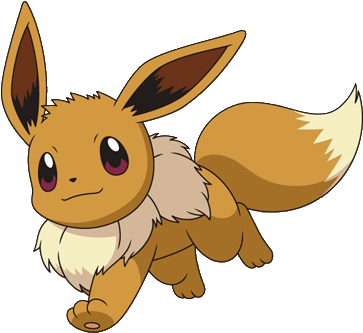

In [114]:
#make a df of eevee and eveelutions
ev = pm_2.loc[[144,145,146,147,211,212,521,522,770],:]
print(ev)

       #      Name    Type 1 Type 2  Total   HP  Attack  Defense  Sp. Atk  \
144  133     Eevee    Normal   none    325   55      55       50       45   
145  134  Vaporeon     Water   none    525  130      65       60      110   
146  135   Jolteon  Electric   none    525   65      65       60      110   
147  136   Flareon      Fire   none    525   65     130       60       95   
211  196    Espeon   Psychic   none    525   65      65       60      130   
212  197   Umbreon      Dark   none    525   95      65      110       60   
521  470   Leafeon     Grass   none    525   65     110      130       60   
522  471   Glaceon       Ice   none    525   65      60      110      130   
770  700   Sylveon     Fairy   none    525   95      65       65      110   

     Sp. Def  Speed  Generation  Legendary         Type 0  average_skp  count  
144       65     55           1      False    Normal/none    54.166667      1  
145       95     65           1      False     Water/none    87.50000

In [115]:
ev.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,average_skp,count
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,285.777778,502.777778,77.777778,75.555556,78.333333,94.444444,97.777778,78.888889,2.444444,83.796296,1.0
std,208.360132,66.666667,24.123525,25.913853,29.580399,31.765198,23.466880,26.312756,1.810463,11.111111,0.0
min,133.000000,325.000000,55.000000,55.000000,50.000000,45.000000,65.000000,55.000000,1.000000,54.166667,1.0
25%,135.000000,525.000000,65.000000,65.000000,60.000000,60.000000,95.000000,65.000000,1.000000,87.500000,1.0
50%,196.000000,525.000000,65.000000,65.000000,60.000000,110.000000,95.000000,65.000000,2.000000,87.500000,1.0
75%,470.000000,525.000000,95.000000,65.000000,110.000000,110.000000,110.000000,95.000000,4.000000,87.500000,1.0
max,700.000000,525.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,6.000000,87.500000,1.0


In [116]:
ev.sort_values('average_skp', ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0,average_skp,count
145,134,Vaporeon,Water,none,525,130,65,60,110,95,65,1,False,Water/none,87.500000,1
146,135,Jolteon,Electric,none,525,65,65,60,110,95,130,1,False,Electric/none,87.500000,1
147,136,Flareon,Fire,none,525,65,130,60,95,110,65,1,False,Fire/none,87.500000,1
211,196,Espeon,Psychic,none,525,65,65,60,130,95,110,2,False,Psychic/none,87.500000,1
212,197,Umbreon,Dark,none,525,95,65,110,60,130,65,2,False,Dark/none,87.500000,1
521,470,Leafeon,Grass,none,525,65,110,130,60,65,95,4,False,Grass/none,87.500000,1
522,471,Glaceon,Ice,none,525,65,60,110,130,95,65,4,False,Ice/none,87.500000,1
770,700,Sylveon,Fairy,none,525,95,65,65,110,130,60,6,False,Fairy/none,87.500000,1
144,133,Eevee,Normal,none,325,55,55,50,45,65,55,1,False,Normal/none,54.166667,1


In [117]:
# All eveelutions have these skill point values 130 65 60 110 95 65
# assigned in different orders
# pretty cool! I was not expecting that
# the question of which is best absolutely depends on the individual and how they build their pokemon team